# HW3 - Stock Movement Prediction

作業檔案：
- hw3.ipynb

資料：
https://www.sharecast.com/index/SP_500/prices/download

- train.csv: S&P 500 訓練資料(2009-2017)
- test.csv: S&P 500 測試資料(2018)


In [1]:
# Read data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data_path = './train.csv'
test_data_path = './test.csv'

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

print(train_df.shape)
print(train_df.head())
print(test_df.shape)
print(test_df.head())

(2264, 6)
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2009      902.99       931.80      934.73     899.35  4048270080
1  05-Jan-2009      929.17       927.45      936.63     919.53  5413910016
2  06-Jan-2009      931.17       934.70      943.85     927.28  5392620032
3  07-Jan-2009      927.45       906.65      927.45     902.37  4704940032
4  08-Jan-2009      905.73       909.73      910.00     896.81  4991549952
(252, 6)
          Date  Open Price  Close Price  High Price  Low Price      Volume
0  02-Jan-2018     2683.73      2695.81     2695.89    2682.36  1846463232
1  03-Jan-2018     2697.85      2713.06     2714.37    2697.77  2090595328
2  04-Jan-2018     2719.31      2723.99     2729.29    2719.07  2100767744
3  05-Jan-2018     2731.33      2743.15     2743.45    2727.92  1918869120
4  08-Jan-2018     2742.67      2747.71     2748.51    2737.60  1894823936


In [2]:
# Drop unnecessary columns
#drop_col_names = ['Date','Open Price','Close Price','High Price','Low Price','Volume']
drop_col_names = ['Date',] # !--- or you can modify it to drop the columns you don't want ---!

train_df.drop(columns=drop_col_names, inplace=True)
test_df.drop(columns=drop_col_names, inplace=True)

print(train_df.shape)
print(train_df.head())
print(test_df.shape)
print(test_df.head())

(2264, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0      902.99       931.80      934.73     899.35  4048270080
1      929.17       927.45      936.63     919.53  5413910016
2      931.17       934.70      943.85     927.28  5392620032
3      927.45       906.65      927.45     902.37  4704940032
4      905.73       909.73      910.00     896.81  4991549952
(252, 5)
   Open Price  Close Price  High Price  Low Price      Volume
0     2683.73      2695.81     2695.89    2682.36  1846463232
1     2697.85      2713.06     2714.37    2697.77  2090595328
2     2719.31      2723.99     2729.29    2719.07  2100767744
3     2731.33      2743.15     2743.45    2727.92  1918869120
4     2742.67      2747.71     2748.51    2737.60  1894823936


In [3]:
# Add the column `Tomorrow Movement` by comparing the `Close Price` with the previous days as the training target

train_df['Tomorrow Movement'] = np.where(train_df['Close Price'].diff() >= 0, 1, 0)
test_df['Tomorrow Movement'] = np.where(test_df['Close Price'].diff() >= 0, 1, 0)

train_df['Tomorrow Movement'] = train_df['Tomorrow Movement'].shift(-1)
test_df['Tomorrow Movement'] = test_df['Tomorrow Movement'].shift(-1)

#print(train_df.head())
#print(train_df.tail())
one = 0
zero = 0
for i in train_df['Tomorrow Movement']:
    if i==1:
        one += 1
    else:
        zero += 1
print(one,zero)
print(one/(one+zero))

1239 1025
0.5472614840989399


In [4]:
# !--- You can add your own data preprocessing here ---!
# 
# for feature in train_df.columns:
#     if feature == 'Tomorrow Movement':
#         continue
#     sns.jointplot(x=feature, y='Tomorrow Movement', data=train_df, kind='kde')
#     plt.title('Correlation between %s and Tomorrow Movement' % feature)
#     plt.show()

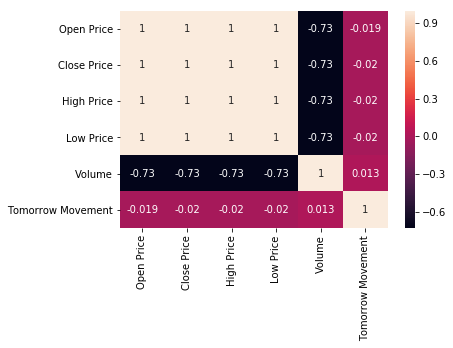

In [5]:
temp_df = train_df.corr()
sns.heatmap(temp_df,annot=True)

In [6]:
# Drop rows with NaN values

train_df = train_df.dropna()
test_df = test_df.dropna()

print(train_df.shape)

(2263, 6)


In [7]:
# Divide x and y data

train_x_df = train_df.drop(columns=['Tomorrow Movement'])
train_y_df = train_df['Tomorrow Movement']

test_x_df = test_df.drop(columns=['Tomorrow Movement'])
test_y_df = test_df['Tomorrow Movement']




# print(train_x_df.shape)
# print(train_x_df.head())
# print(train_y_df.shape)
# print(train_y_df.head())
# print('-----')
# print(test_x_df.shape)
# print(test_x_df.head())
# print(test_y_df.shape)
# print(test_y_df.head())

In [8]:
# Normalize data

# !--- Modify here if you want ---!

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x_df)

normalized_train_x_df = scaler.transform(train_x_df)
normalized_train_x_df = np.transpose(normalized_train_x_df)

normalized_train_x_df = pd.DataFrame({
    'Open Price': normalized_train_x_df[0],
    'Close Price': normalized_train_x_df[1],
    'High Price': normalized_train_x_df[2],
    'Low Price': normalized_train_x_df[3],
    'Volume': normalized_train_x_df[4],
})

normalized_test_x_df = scaler.transform(test_x_df)
normalized_test_x_df = np.transpose(normalized_test_x_df)
normalized_test_x_df = pd.DataFrame({
    'Open Price': normalized_test_x_df[0],
    'Close Price': normalized_test_x_df[1],
    'High Price': normalized_test_x_df[2],
    'Low Price': normalized_test_x_df[3],
    'Volume': normalized_test_x_df[4],
})

print(normalized_train_x_df.head())
print(train_y_df[:5])

   Close Price  High Price  Low Price  Open Price    Volume
0    -1.494607   -1.505683  -1.541181   -1.552572  0.813175
1    -1.503581   -1.501760  -1.499581   -1.498571  1.823826
2    -1.488625   -1.486853  -1.483605   -1.494446  1.808070
3    -1.546489   -1.520714  -1.534956   -1.502119  1.299148
4    -1.540136   -1.556744  -1.546417   -1.546921  1.511255
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Tomorrow Movement, dtype: float64


# Logistic Regression

In [9]:
# Train & Predict using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model =  LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
lr_model.fit(normalized_train_x_df,train_y_df) # !-- Fill the training data here --!

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
lr_training_acc = lr_model.score(normalized_train_x_df,train_y_df)
print(lr_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
lr_predict_test_result = lr_model.predict(normalized_test_x_df)
lr_testing_acc = lr_model.score(normalized_test_x_df,test_y_df)
print(lr_testing_acc)

print('\npredicted testing labels:')
print(lr_predict_test_result)

training accuracy:
0.5470614228899691

testing accuracy:
0.5258964143426295

predicted testing labels:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.]


In [10]:
# Print precision, recall, fbeta-score and confusion matrix

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, lr_predict_test_result, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, lr_predict_test_result).ravel()
print((tn, fp, fn, tp))

precision, recall, fbeta-score:
(0.5143026221473938, 0.5258964143426295, 0.4006419948895187, None)

confusion matrix(tn, fp, fn, tp):
(6, 113, 6, 126)


# SVM

In [11]:
# Train & Predict with SVC

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_model = SVC(C=0.5, kernel='linear', probability=True)
svc_model.fit(normalized_train_x_df,train_y_df) 

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
svc_training_acc = svc_model.score(normalized_train_x_df,train_y_df)
print(svc_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
svc_predict_test_result = svc_model.predict(normalized_test_x_df)
svc_testing_acc = svc_model.score(normalized_test_x_df,test_y_df)
print(svc_testing_acc)

#print('\npredicted testing labels:')
#print(svc_predict_test_result)

training accuracy:
0.5475033141847105

testing accuracy:
0.5258964143426295


In [12]:
# Print precision, recall, fbeta-score and confusion matrix

print('precision, recall, fbeta-score:')
print(precision_recall_fscore_support(test_y_df, svc_predict_test_result, average='weighted'))
print('\nconfusion matrix(tn, fp, fn, tp):')
tn, fp, fn, tp = confusion_matrix(test_y_df, svc_predict_test_result).ravel()
print((tn, fp, fn, tp))

precision, recall, fbeta-score:
(0.2765670386184346, 0.5258964143426295, 0.3624977895207681, None)

confusion matrix(tn, fp, fn, tp):
(0, 119, 0, 132)


C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Network

Epoch 1/10
2263/2263 [==============================] - 1s 408us/step - loss: 0.7040 - acc: 0.4980
Epoch 2/10
2263/2263 [==============================] - 0s 147us/step - loss: 0.6924 - acc: 0.5307
Epoch 3/10
2263/2263 [==============================] - 0s 153us/step - loss: 0.6906 - acc: 0.5466
Epoch 4/10
2263/2263 [==============================] - 0s 150us/step - loss: 0.6902 - acc: 0.5475
Epoch 5/10
2263/2263 [==============================] - 0s 152us/step - loss: 0.6894 - acc: 0.5475
Epoch 6/10
2263/2263 [==============================] - 0s 147us/step - loss: 0.6890 - acc: 0.5475
Epoch 7/10
2263/2263 [==============================] - 0s 150us/step - loss: 0.6890 - acc: 0.5475
Epoch 8/10
2263/2263 [==============================] - 0s 153us/step - loss: 0.6885 - acc: 0.5475
Epoch 9/10
2263/2263 [==============================] - 0s 149us/step - loss: 0.6886 - acc: 0.5475
Epoch 10/10
251/251 [==============================] - 0s 68us/step
Training accuracy: 0.5475033142373881

Te

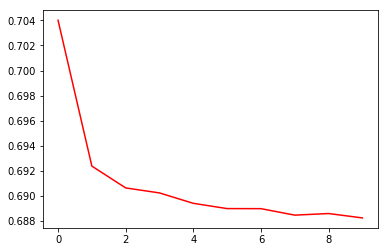

In [18]:
from keras import models, layers, optimizers, regularizers

# create a sequential model
model = models.Sequential()
hidden_units = 10

# add the hidden layer
model.add(layers.Dense(input_dim=5,units=hidden_units,activation='relu'))
#for i in range(5):
#    model.add(layers.Dense(units=hidden_units, activation='relu'))


# add the output layer
model.add(layers.Dense(input_dim=hidden_units,units=1,activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer='adam',
              metrics=['accuracy'])

# train the parameters
history = model.fit(normalized_train_x_df, train_y_df, epochs=10)

# evaluate accuracy
train_acc = model.evaluate(normalized_train_x_df, train_y_df)[1]
test_acc = model.evaluate(normalized_test_x_df, test_y_df)[1]
print('Training accuracy: %s' % train_acc)
print('\nTesting accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [14]:
# Define NN output groundtruth

# falling_prob = pd.DataFrame(data=np.where(train_y_df == 0, 1, 0)[:])
# train_y_df = pd.DataFrame(data=np.where(train_y_df == 0, 0, 1)[:])
# train_y_df = pd.concat( [ falling_prob, train_y_df ], axis=1, ignore_index=True )

# falling_prob = pd.DataFrame(data=np.where(test_y_df == 0, 1, 0)[:])
# test_y_df = pd.DataFrame(data=np.where(test_y_df == 0, 0, 1)[:])
# test_y_df = pd.concat( [ falling_prob, test_y_df ], axis=1, ignore_index=True )

# print(train_y_df.shape)
# print(train_y_df.head())

In [15]:
# Define NN structure

# import torch
# import torch.nn.functional as F

# # !--- You can modify the NN structure here ---!
# class M_NN(torch.nn.Module):
#     def __init__(self, D_in, H, D_out):
#         super(M_NN, self).__init__()
#         self.linear1 = torch.nn.Linear(D_in, H)
#         self.linear2 = torch.nn.Linear(H, D_out)

#     def forward(self, x):
#         h = self.linear1(x)
#         acti_out = F.relu(h)
#         y_pred = self.linear2(h)
#         return y_pred


# # N = batch size, D_in = input size, H = hidden size, D_out = output size
# N, D_in, H, D_out = 300, 5, 100, 2  # !--- You can modify here ---!

# model = M_NN(D_in, H, D_out)
# criterion = torch.nn.BCEWithLogitsLoss(reduction='sum') # !--- You can modify here ---!
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # !--- You can modify here ---!


# # Train NN
# # !--- You can modify here ---!

# for t in range(1000):
#     for batch_num in range(N, len(normalized_train_x_df), N): 
#         y_pred = model(normalized_train_x_df) # !-- Fill the training batch data here --!
#         loss = criterion(y_pred,train_y_df) # !-- Fill the prediction & groundtruth here to calculate loss --!
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#     if (t%100 == 0):
#         print('epoch:%d - loss:%.10f' % (t, loss.item()))

In [16]:
# Predict

# nn_predict_train_y =  normalized_train_x_df# !-- Predict training data here --!
# result_train = np.where(nn_predict_train_y[:, 0] > nn_predict_train_y[:, 1], 1, 0) # !-- You can modify here --!
# print('training accuracy:')
# print(accuracy_score(train_y_df[0], result_train))

# nn_predict_test_y =  # !-- Predict training data here --!
# result_test = np.where(nn_predict_test_y[:, 0] > nn_predict_test_y[:, 1], 1, 0) # !-- You can modify here --!
# print('\ntesting accuracy:')
# print(accuracy_score(test_y_df[0], result_test))

# print('\npredicted testing prob:')
# print(nn_predict_test_y)
# print('\npredicted testing labels:')
# print(result_test)

In [17]:
# Print precision, recall, fbeta-score and confusion matrix

# print('\nprecision, recall, fbeta-score:')
# print(precision_recall_fscore_support(test_y_df[0], result_test, average='weighted'))
# print('\nconfusion matrix(tn, fp, fn, tp):')
# tn, fp, fn, tp = confusion_matrix(test_y_df[0], result_test).ravel()
# print((tn, fp, fn, tp))

# Discussion

## 1.logistic regression 
training accuracy:
0.5470614228899691

testing accuracy:
0.5258964143426295

## 2.SVM
training accuracy:
0.5475033141847105

testing accuracy:
0.5258964143426295

## 3.NN

Training accuracy: 
0.5475033142373881

Testing accuracy: 
0.525896415529973

Testing data 的accuracy大概只有52.6%，可以說是幾乎沒有train到好的結果，最大的原因大概就是input data和我們要預測的資訊本身關聯性就不大，當然也沒辦法找到好的function來做預測，從這次的作業也算是真的體會到甚麼是garbage in, garbage out了。還有對於NN來說可能資料量不夠多也很難讓它發揮真正的實力，而對於SVM來說加入太多不必要的attribute反而會讓它效果更不好，所以要使用哪種分類器不僅要視data的類型或分佈，也要針對分類器的優缺點來修正input的形式。